## Mathematical Principles in Pattern Recognition (2017/2018)
$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

# Lab 1

### Jan Schutte, 11030844  
### Micha de Groot, 10434410

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Central Limit Theory

In this exercise we play with discrete variables, drawn from a Bernoulli and Binomial distributions. In the end we will explore an example Central Limit Theorem (CLT) with respect to a Binomial random variable. THe CLT states that the sum or average of many independent copies of a random variable is approximately a normal random variable. An example plot of the probability desnity of a standard normal distribution is given below.

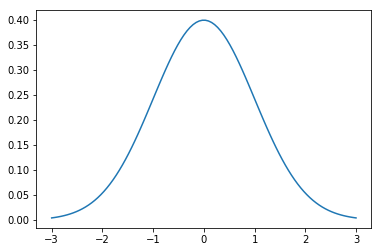

In [2]:
def gaussian_pdf(x, mu, sigma):
    return np.exp(-(x-mu)**2 /(2*sigma**2))/math.sqrt(2*math.pi * sigma**2)

x = np.linspace(-3,3,100)
plt.plot(x, gaussian_pdf(x, mu=0, sigma=1))
plt.show()

### 1.1 Bernoulli trial
**[20 points]** Write a function `bernoulli_trial(p)` that returns a $1$ with probability $p$ and $0$ with probability $1 - p$. Use a random sampling method from the `random` or `numpy.random` modules in your implementation. Print the results of 10 repeated independent trials by calling the function 10 times for $p = 0.5$.

In [3]:
def bernoulli_trial(p=0.5):
    if random.random() < p:
        return 1
    return 0

for _ in range(10):
    print(bernoulli_trial(0.5), end=' ')

0 1 1 1 0 1 1 0 1 1 

### 1.2 Multiple trials
**[20 points]** Write a method `multiple_trials(n, p)` that returns a $N$-dimensional vector $\bx$ where each $x_i$ is a Bernoulli sample. Use your implementation of the Bernoulli trial and make sure it returns a vector, i.e. a numpy array. Again print the output of 10 trials with $p = 0.5$ 

In [4]:
def multiple_trials(n, p, m=1):
    result = random.random(size=(m,n))
    return where(result < p, 1, 0)

multiple_trials(10, 0.5)

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

### 1.3 Binomial
**[20 points]** Write a simple function that, for a given numpy array consisting of zero's and ones, return the number of positives. Use this in a function named `binomial_sample(n,m,p)` that returns a vector of size $n$, where each slot contains the number of positives in $m$ trials, where each positive has probability $p$.

In [5]:
def binomial_sample(n,m,p):
    result = multiple_trials(n, p, m)
    return sum(result, axis=0)

binomial_sample(10, 10, 0.5)

array([7, 7, 2, 6, 7, 8, 7, 5, 1, 6])

### 1.4 Histogram
**[20 points]** Recreate a sampling distribution similar to Figure 2.1 in Bishop by drawing $500$ Binomial samples, i.e. from `binomial_sample(n,m,p)`, with $m=10$ and $p=0.25$. Make sure you normalize the histogram to get a sampling density distribution. Hint: you can use `plt.hist()` to plot historgams.

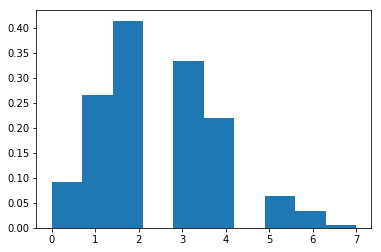

In [6]:
plt.hist(binomial_sample(500, 10, 0.25), normed=True);

### 1.5 Central limit theorem
**[20 points]** Plot another histogram but now with $10^5$ samples, $p=0.4$ and $m=10$. In the same plot, draw a normal distribution with $\mu = 4$ and $\sigma=\sqrt{2.4}$. Do these results make sense?

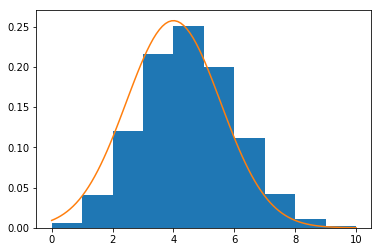

In [7]:
plt.hist(binomial_sample(10**5, 10, 0.4), normed=True)
x = np.linspace(0,10,100)
plt.plot(x, gaussian_pdf(x, mu=4, sigma=sqrt(2.4)));

$$
E[X] = \sum(p * value) = \\
E[X] = 0.6 * 0 + 1 * 0.4 = 0.4 \\
$$
If we repeat this experiment several times the average number of ones approaches 0.4 of the total.
In the graph we can see that the normal curve matches with the bins of the histogram.

$$
Var[X]= E[X^2 - E[X]^2] = \\
E[X^2] - E[X]^2 = \\
0.4 - 0.4^2 = 0.24 \\
$$
When doing 10 samples this number is multiplied by 10 giving 2.4, the standard deviation is the square root of this number.